In [71]:
import os
import os.path as op
import shutil

import mne
from mne import read_evokeds

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

#https://mne.tools/stable/overview/implementation.html

## Extract Epochs for plotting from every subjects

In [72]:
subjects = glob.glob('Path/*.edf') 

107

In [73]:
#Analysis settings
tmin = -0.2
tmax = 1
baseline = (-0.2, 0)

montage = mne.channels.read_custom_montage('Path/BC-MR-64.bvef') #set montage 

In [74]:
primer_happy_strong = []
primer_happy_weak = []
primer_sad_strong = []
primer_sad_weak = []
primer_neutral_strong = []
primer_neutral_weak = []
primer = []
primer_unconscious = []
primer_conscious = []

for i in subjects:

    # Load Dataset
    eeg = mne.io.read_raw_edf(i, preload = True)
    eeg.set_channel_types(mapping={'ECG': 'ecg'}) #define ECG channel 
    #montage.plot() 
    eeg.set_montage(montage, match_case=False) #set montage to raw dataset
    
    #Find events
    events, event_id = mne.events_from_annotations(eeg)
    
    #Define epochs
    epochs = mne.Epochs(eeg, events,
                        event_id = event_id,
                        preload = True,
                        tmin= tmin, 
                        tmax= tmax, 
                        event_repeated='merge',
                        baseline = baseline) #set baseline from -0.2s to - 0 seconds
    
    evoked_primer_happy_strong = epochs['h_h_strong','h_n_strong','h_s_strong'].average()
    evoked_primer_happy_weak = epochs['h_h_weak','h_n_weak','h_s_weak'].average()
    evoked_primer_sad_strong = epochs['s_h_strong','s_n_strong','s_s_strong'].average()
    evoked_primer_sad_weak = epochs['s_h_weak','s_n_weak','s_s_weak'].average()
    evoked_primer_neutral_strong = epochs['n_h_strong','n_n_strong','n_s_strong'].average()
    evoked_primer_neutral_weak = epochs['n_h_weak','n_n_weak','n_s_weak'].average()
    
    evoked_primer = epochs['h_h_strong','h_n_strong','h_s_strong','h_h_weak','h_n_weak','h_s_weak','s_h_strong','s_n_strong','s_s_strong','s_h_weak','s_n_weak','s_s_weak','n_h_strong','n_n_strong','n_s_strong','n_h_weak','n_n_weak','n_s_weak'].average()
    evoked_primer_unconscious = epochs['h_h_strong','h_n_strong','h_s_strong','s_h_strong','s_n_strong','s_s_strong','n_h_strong','n_n_strong','n_s_strong'].average()
    evoked_primer_conscious = epochs['h_h_weak','h_n_weak','h_s_weak','s_h_weak','s_n_weak','s_s_weak','n_h_weak','n_n_weak','n_s_weak'].average()
    
    #append all evokeds
    primer_happy_strong.append(evoked_primer_happy_strong)
    primer_happy_weak.append(evoked_primer_happy_weak)
    primer_sad_strong.append(evoked_primer_sad_strong)
    primer_sad_weak.append(evoked_primer_sad_weak)    
    primer_neutral_strong.append(evoked_primer_neutral_strong)
    primer_neutral_weak.append(evoked_primer_neutral_weak)   
    primer.append(evoked_primer)
    primer_unconscious.append(evoked_primer_unconscious)
    primer_conscious.append(evoked_primer_conscious)
    
    del eeg  # reduce memory usage

Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-004_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 126749  =      0.000 ...   506.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
814 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 814 events and 301 original time points ...


C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1938 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-006_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131999  =      0.000 ...   527.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1827 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


3 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-007_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 119999  =      0.000 ...   479.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1686 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-008_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 129749  =      0.000 ...   518.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1891 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-009_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 118124  =      0.000 ...   472.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1809 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


3 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-010_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 81374  =      0.000 ...   325.496 secs.

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1454 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TPEAK', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
639 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 639 events and 301 original time points ...
2 bad epochs dropped


C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1795 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-012_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 126749  =      0.000 ...   506.996 secs...
Used Annotations 

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1917 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-014_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 125624  =      0.000 ...   502.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1845 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-015_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131249  =      0.000 ...   524.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1839 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-017_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133124  =      0.000 ...   532.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1854 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-018_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97124  =      0.000 ...   388.496 secs.

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1655 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-019_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 129749  =      0.000 ...   518.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'TEND', 'TPEAK', 'TSTART', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
751 matching events found
Applying baseline 

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1869 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


7 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-020_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 94874  =      0.000 ...   379.496 secs.

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1419 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-021_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 107999  =      0.000 ...   431.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1683 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-022_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134249  =      0.000 ...   536.996 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_strong', 'h_n_weak', 'h_s_strong', 'h_s_weak', 'n_h_strong', 'n_h_weak', 'n_n_strong', 'n_n_weak', 'n_s_strong', 'n_s_weak', 's_h_strong', 's_h_weak', 's_n_strong', 's_n_weak', 's_s_strong', 's_s_weak']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting 

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1970 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


4 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-024_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 129374  =      0.000 ...   517.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1850 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-025_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132749  =      0.000 ...   530.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1955 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-026_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 125999  =      0.000 ...   503.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1651 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-027_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133124  =      0.000 ...   532.496 secs...
Used Annotations 

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1986 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


3 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-031_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134999  =      0.000 ...   539.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1885 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-032_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 122999  =      0.000 ...   491.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1846 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-033_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134624  =      0.000 ...   538.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1905 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-034_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131999  =      0.000 ...   527.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1905 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-035_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133874  =      0.000 ...   535.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1918 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


3 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-036_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134249  =      0.000 ...   536.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1846 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-037_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 128624  =      0.000 ...   514.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1927 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-038_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 125249  =      0.000 ...   500.996 secs...
Used Annotations 

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1839 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-039_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134624  =      0.000 ...   538.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1862 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-040_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133499  =      0.000 ...   533.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1868 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


4 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-041_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134249  =      0.000 ...   536.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1937 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-042_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 95624  =      0.000 ...   382.496 secs.

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1280 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-043_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132374  =      0.000 ...   529.496 secs...
Used Annotations 

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1820 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


4 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-044_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 130874  =      0.000 ...   523.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1979 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


3 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-045_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134999  =      0.000 ...   539.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 2088 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


3 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-046_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132749  =      0.000 ...   530.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 2033 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


5 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-047_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133124  =      0.000 ...   532.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 2060 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


3 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-049_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134999  =      0.000 ...   539.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 2013 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-051_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133874  =      0.000 ...   535.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1853 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-052_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132749  =      0.000 ...   530.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1935 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


5 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-053_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 122999  =      0.000 ...   491.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1876 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-054_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134624  =      0.000 ...   538.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1938 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-056_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 124499  =      0.000 ...   497.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1775 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-057_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133124  =      0.000 ...   532.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1936 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-059_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131624  =      0.000 ...   526.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1933 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


3 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-062_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133124  =      0.000 ...   532.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1887 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-064_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132749  =      0.000 ...   530.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1944 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-065_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 114374  =      0.000 ...   457.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1585 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-066_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 118874  =      0.000 ...   475.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1717 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-068_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 117749  =      0.000 ...   470.996 secs...
Used Annotations 

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1630 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


6 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-069_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 112499  =      0.000 ...   449.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1724 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-070_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134249  =      0.000 ...   536.996 secs...
Used Annotations 

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1968 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-071_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 130499  =      0.000 ...   521.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1881 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-072_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132374  =      0.000 ...   529.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 2071 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-073_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 127499  =      0.000 ...   509.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1857 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-074_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131999  =      0.000 ...   527.996 secs...
Used Annotations 

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1941 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


4 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-075_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134624  =      0.000 ...   538.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1928 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-076_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131624  =      0.000 ...   526.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1893 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


7 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-077_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133499  =      0.000 ...   533.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1938 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


6 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-078_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 126374  =      0.000 ...   505.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1830 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-079_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132374  =      0.000 ...   529.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1890 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


3 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-081_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132749  =      0.000 ...   530.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1876 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


3 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-082_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131249  =      0.000 ...   524.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1967 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-083_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131249  =      0.000 ...   524.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1842 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-084_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132749  =      0.000 ...   530.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1865 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-085_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 106874  =      0.000 ...   427.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1408 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-086_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133874  =      0.000 ...   535.496 secs...
Used Annotations 

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1890 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


4 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-088_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 89624  =      0.000 ...   358.496 secs.

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1282 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-089_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 123374  =      0.000 ...   493.496 secs...
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S 50', 'S 60', 'S 70', 'S120', 'S130', 'S140', 'S150', 'S160', 'S170', 'Time 0', 'h_h_strong', 'h_h_weak', 'h_n_stro

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1778 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-090_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133874  =      0.000 ...   535.496 secs...
Used Annotations 

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1759 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-091_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134999  =      0.000 ...   539.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1765 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-093_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 123374  =      0.000 ...   493.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1803 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-094_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 124124  =      0.000 ...   496.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1784 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-096_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134249  =      0.000 ...   536.996 secs...
Used Annotations 

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1866 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


4 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-097_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 126749  =      0.000 ...   506.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 2006 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


5 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-098_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 120374  =      0.000 ...   481.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1713 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


6 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-099_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134249  =      0.000 ...   536.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1801 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-100_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133124  =      0.000 ...   532.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1961 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-101_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 130499  =      0.000 ...   521.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1976 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


4 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-102_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132374  =      0.000 ...   529.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1893 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-103_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134999  =      0.000 ...   539.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1811 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


5 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-104_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 119624  =      0.000 ...   478.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1701 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-105_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131624  =      0.000 ...   526.496 secs...
Used Annotations 

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 2000 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\Sub-106_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 123749  =      0.000 ...   494.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1777 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\Sub-107_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 125999  =      0.000 ...   503.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1869 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


3 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\Sub-108_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 130874  =      0.000 ...   523.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1933 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\Sub-109_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131999  =      0.000 ...   527.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1964 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


5 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\Sub-110_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134249  =      0.000 ...   536.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1849 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\Sub-111_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133874  =      0.000 ...   535.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1833 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


4 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\Sub-112_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 125624  =      0.000 ...   502.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1964 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


3 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\Sub-113_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 123749  =      0.000 ...   494.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1801 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\Sub-114_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132374  =      0.000 ...   529.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1822 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


5 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\Sub-115_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 120749  =      0.000 ...   482.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1851 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\Sub-116_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 129749  =      0.000 ...   518.996 secs...
Used Annotations 

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1865 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\Sub-117_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134249  =      0.000 ...   536.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1816 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\Sub-118_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134999  =      0.000 ...   539.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1902 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


3 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-120_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132374  =      0.000 ...   529.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 2160 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-122_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 121124  =      0.000 ...   484.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1725 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-123_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 129374  =      0.000 ...   517.496 secs...
Used Annotations 

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 2108 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-124_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131999  =      0.000 ...   527.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1926 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-125_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131999  =      0.000 ...   527.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1922 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-126_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133874  =      0.000 ...   535.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1885 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-127_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 134624  =      0.000 ...   538.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1968 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-128_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 117374  =      0.000 ...   469.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1677 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-129_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 130124  =      0.000 ...   520.496 secs...
Used Annotations 

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1976 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


3 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-130_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 133124  =      0.000 ...   532.496 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1809 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from C:\Users\juhoffmann\Desktop\EEG_BIDS\EEG_250Hz\edf\sub-131_BackwardMask_Preprocessed.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 126749  =      0.000 ...   506.996 secs

C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:14: RuntimeWarning: Omitted 1943 annotation(s) that were outside data range.
  eeg = mne.io.read_raw_edf(i, preload = True)
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset
C:\Users\juhoffmann\AppData\Local\Temp\ipykernel_9188\58317019.py:17: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg.set_montage(montage, match_case=False) #set montage to raw dataset


7 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [75]:
i

'C:/Users/juhoffmann/Desktop/EEG_BIDS/EEG_250Hz/edf\\sub-131_BackwardMask_Preprocessed.edf'

## Plot topomap

In [76]:
average_primer = mne.combine_evoked(primer, weights='equal')
average_primer_unconscious = mne.combine_evoked(primer_unconscious, weights='equal')
average_primer_conscious = mne.combine_evoked(primer_conscious, weights='equal')

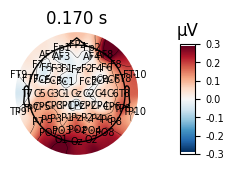

In [78]:
fig = average_primer.plot_topomap(0.170,extrapolate="head",show_names=True)
fig.set_size_inches(7, 5, forward=True) 
fig.savefig('TopoMap_primer.png', dpi=300)

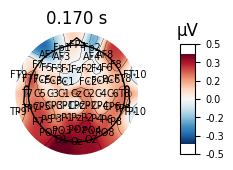

In [79]:
fig2 = average_primer_unconscious.plot_topomap(0.170,extrapolate="head",show_names=True)
fig2.set_size_inches(7, 5, forward=True) 
fig2.savefig('TopoMap_uncon_primer.png', dpi=300)

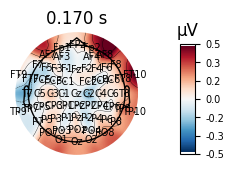

In [81]:
fig3 = average_primer_conscious.plot_topomap(0.170,extrapolate="head",show_names=True)
fig3.set_size_inches(7, 5, forward=True) 
fig3.savefig('TopoMap_con_primer.png', dpi=300)